In [1]:
import sys
sys.path.append('../../../GraphGallery/')
sys.path.append('../../../GraphAdv/')

from graphgallery.nn.models import Deepwalk
from graphadv.attack.untargeted import NodeEmbeddingAttack

import matplotlib.pyplot as plt

In [2]:
from graphgallery.data import NPZDataset
data = NPZDataset('citeseer', root="~/GraphData/datasets/", verbose=False, standardize=True)
adj, x, labels = data.graph.unpack()
idx_train, idx_val, idx_test = data.split(random_state=15)


Downloaded dataset files have existed.
Processing...
Processing completed.


In [3]:
# labels could be not specified, it is used for the method `show_edge_flips`
attacker = NodeEmbeddingAttack(adj, labels=labels, seed=None)
attacker.reset()
attacker.attack(0.05, structure_attack=True, feature_attack=False)
# show logs
attacker.show_edge_flips(detail=False)

Flip 183 edges, 0 added, 183 removed. Added edges with different classes: 0.00%, removed edges with the same classes: 66.12%


# Before Attack

In [4]:
model_before = Deepwalk(adj, labels)
model_before.build()
model_before.train(idx_train)
accuracy = model_before.test(idx_test)
print(f'Test accuracy {accuracy:.2%}')

Test accuracy 69.85%


# After Attack

In [5]:
model_after = Deepwalk(attacker.A, labels)
model_after.build()
model_after.train(idx_train)
accuracy = model_after.test(idx_test)
print(f'Test accuracy {accuracy:.2%}')

Test accuracy 65.17%


#  Visulation

In [6]:
def plot(embeddings, name):
    from sklearn.manifold import TSNE
    X_embedded = TSNE(n_components=2).fit_transform(embeddings)    
    
    with plt.style.context(['science', 'no-latex']):
        plt.scatter(X_embedded[:,0], X_embedded[:,1], c=labels, cmap=plt.cm.Spectral)
        plt.autoscale(tight=True)
        plt.title(name)
        plt.show()    

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


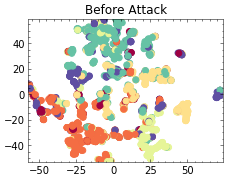

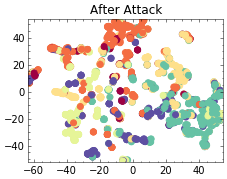

In [7]:
plot(model_before.embeddings, name="Before Attack")
plot(model_after.embeddings, name="After Attack")